PRECISION @ 10


In [7]:
import os
import pandas as pd
import math

# COMBINATION
comb = 'Co3'

# folder path
dir_path  = '/media/cecilia/DISCO2/mogp_with_terms_results/'+comb+ "/"
save_path = '/home/cecilia/repos/mogp_with_terms/moeir_comparison/'

topicos = os.listdir(dir_path)

#test
#topicos = [topicos[0], topicos[1]]
print(topicos)

['1', '134', '187', '215', '221', '25', '259', '289', '350', '363', '37', '403', '418', '428', '465', '476', '528', '529', '537', '538', '556', '561', '58', '586', '99']


In [8]:
df_ave_data = pd.DataFrame(columns=['topic', '1','2','3', '4', '5'])

for t in topicos:    
    files = os.listdir( "".join( [dir_path,"/", t]))
        
    # inserto nro de topico
    row = [t]

    for f in sorted(files):
        if "_EVALUATION__precision.txt" in f:
                        
            run = f.split('_')[1] # nro de run
            path_pr = "".join([dir_path,"/", t,"/", f])
            
            # read text file into pandas DataFrame
            df_metric = pd.read_csv(path_pr, header=None, sep='\s+')
                                            
            mean = df_metric.mean(numeric_only=True, axis=0)

            # mean es un df, asi que acceder a columna 0
            row.append(mean[0])            
    
    
    # df con promedio de la ultima poblacion de p@10 de cada corrida para cada topico
    #    topic     1      2       3           4      5        
    #    134	0.7050	0.719	0.760000	0.816	0.808
    #     1	    0.8055	0.817	0.799333	0.690	0.830
    df_ave_data = pd.concat([pd.DataFrame([row], columns=df_ave_data.columns), df_ave_data], ignore_index=True)


# set the 'topic' column as index
df_ave_data.set_index('topic', inplace=True)
df_ave_data = df_ave_data.sort_values(by='topic', ascending=True)

df_ave_data = df_ave_data.transpose()
df_ave_data.to_csv(save_path + 'co3_precision10_evaluation_by_run_last_gen.csv')

df_ave_data

topic,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
1,0.805500,0.705,0.895,0.378,0.929,0.783,0.126000,0.655,0.717905,0.491,...,0.138,0.771,0.645,0.509,0.808,0.070667,0.283,0.275095,0.743000,0.208
2,0.817000,0.719,0.762,0.260,0.951,0.675,0.110000,0.448,0.720000,0.573,...,0.172,0.796,0.628,0.618,0.809,0.276000,0.403,0.308250,0.595722,0.298
3,0.799333,0.760,0.826,0.411,0.939,0.756,0.220000,0.427,0.811000,0.640,...,0.108,0.728,0.511,0.689,0.880,0.162000,0.404,0.392000,0.691000,0.283
4,0.690000,0.816,0.793,0.370,0.962,0.787,0.039000,0.746,0.679000,0.587,...,0.251,0.746,0.523,0.456,0.827,0.030000,0.490,0.394000,0.848000,0.264
5,0.830000,0.808,0.753,0.350,0.939,0.649,0.106167,0.693,0.844000,0.786,...,0.178,0.748,0.678,0.656,0.776,0.215000,0.439,0.438000,0.583333,0.272


In [9]:

stats_by_topic = df_ave_data.agg(['mean', 'count', 'std'])
stats_by_topic

,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
mean,0.788367,0.761600,0.805800,0.353800,0.944000,0.730000,0.120233,0.593800,0.754381,0.615400,...,0.169400,0.757800,0.597000,0.585600,0.820000,0.150733,0.403800,0.361469,0.692211,0.265000
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
std,0.056221,0.050332,0.057521,0.056861,0.012728,0.063875,0.064977,0.146484,0.069700,0.109304,...,0.053608,0.026253,0.075329,0.099198,0.038243,0.101163,0.076261,0.067343,0.109562,0.034322


In [10]:
stats_all_topics =stats_by_topic.transpose()
stats_all_topics

,mean,count,std
1,0.788367,5.0,0.056221
134,0.761600,5.0,0.050332
187,0.805800,5.0,0.057521
215,0.353800,5.0,0.056861
221,0.944000,5.0,0.012728
25,0.730000,5.0,0.063875
259,0.120233,5.0,0.064977
289,0.593800,5.0,0.146484
350,0.754381,5.0,0.069700
363,0.615400,5.0,0.109304


se promedian solo los promedios de los tópicos y se calcula el STD sobre esos promedios

In [11]:
stats_all_topics['mean'].describe().transpose()


t = pd.DataFrame({  'mean_prec': [stats_all_topics['mean'].mean()],                    
                    'count_prec': [stats_all_topics['mean'].count()],
                    'std_prec': [stats_all_topics['mean'].std()]})

ci95_hi = []
ci95_lo = []

m, c, s = t.loc[0]

ci95_hi.append(m + 1.96*s/math.sqrt(c))
ci95_lo.append(m - 1.96*s/math.sqrt(c))

t['ci95_lo_prec'] = ci95_lo
t['ci95_hi_prec'] = ci95_hi


t.to_csv(save_path + 'co3_precision10_evaluation_stats_last_gen.csv')
t

,mean_prec,count_prec,std_prec,ci95_lo_prec,ci95_hi_prec
0,0.55984,25,0.259999,0.45792,0.661759


Text(0.5, 0.98, 'Precision@10  - Co3')

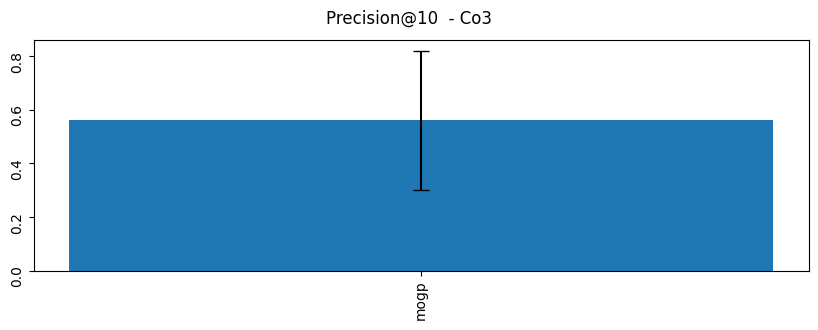

In [12]:
######### PRECISION @ 10
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1,1, figsize=(10, 3), sharey=False)
axs.tick_params(labelrotation=90)
axs.bar('mogp', t['mean_prec'], yerr=t['std_prec'], capsize=6)

fig.suptitle('Precision@10  - '+ comb)